<h3>Code to generate figures for paper <br>
<i>Reaction-drift-diffusion models from master equations: application to material defects</i></h3>

Examples can be run in this notebook or exported

More information on atomic sampling scheme `TAMMBER` at [tomswinburne.github.io](tomswinburne.github.io)

(c) TD Swinburne, CNRS / CINaM, 2021 

Run the following cell to install required packages, if you don't have them:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from helper_scripts import generate_random_blocks, bloch_spectrum, coarse_grain, plot_model, plot_spectrum_3d, plot_spectrum
my_cmap = 'plasma'

## Simple mixing case, $P=1$

/Users/ts/Code/TAMMBER/ReactionDiffusion/helper_scripts.py:373: RuntimeWarning: divide by zero encountered in log
  lrM = np.where(rM<=1e-13,np.nan,-np.log(rM))
/Users/ts/Code/TAMMBER/ReactionDiffusion/helper_scripts.py:373: RuntimeWarning: invalid value encountered in log
  lrM = np.where(rM<=1e-13,np.nan,-np.log(rM))


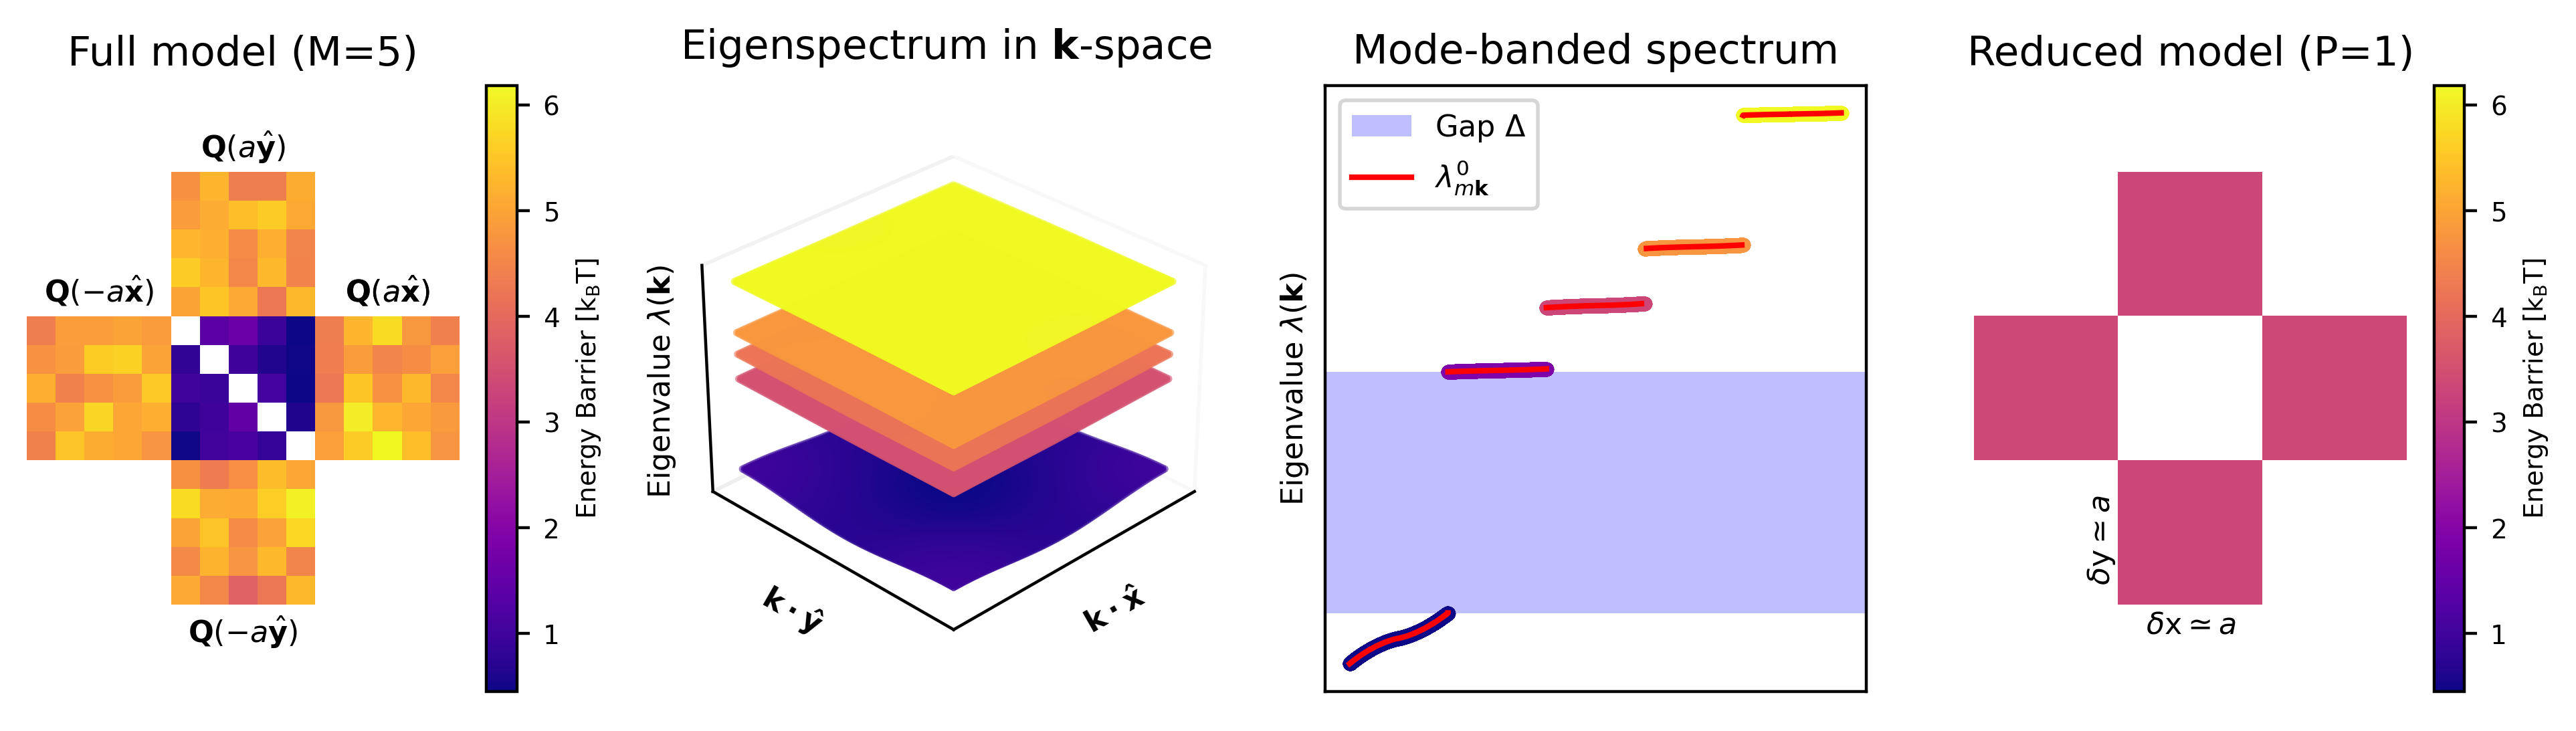

In [2]:
N = 5
rN = 1
l_homog = 1 # homogenization length scale

C,L,R,model_matrix,pi = generate_random_blocks(N=N,std_min=1.3, # 
                                    mean_bar=[2.0,5.0,5.0],std_bar=1.5,connectivity=N)


ev_data = bloch_spectrum(C,L,R,Bx=101)
reduced_model_matrix,approx_ev_data = coarse_grain(C,L,R,ev_data,reduced_modes=rN)

# plot model
fig = plt.figure(dpi=400,figsize=(12,3))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(141)
ax.set_title(r"Full model (M=%d)" % N ,fontsize=11,pad=12)
lims = plot_model(fig,ax,model_matrix,my_cmap=my_cmap)

ax.text(1.4*N,-1.0,r"$\mathbf{Q}(a\hat{\mathbf{y}})$" ,fontsize=8,ha='center',color='k')
ax.text(2.4*N,-1.0+N,r"$\mathbf{Q}(a\hat{\mathbf{x}})$" ,fontsize=8,ha='center',color='k')

ax.text(1.4*N,+0.8+3*N,r"$\mathbf{Q}(-a\hat{\mathbf{y}})$" ,fontsize=8,ha='center',color='k')
ax.text(2.4*N,-1.0+N,r"$\mathbf{Q}(a\hat{\mathbf{x}})$" ,fontsize=8,ha='center',color='k')
ax.text(0.4*N,-1.0+N,r"$\mathbf{Q}(-a\hat{\mathbf{x}})$" ,fontsize=8,ha='center',color='k')




# plot 3D eigenspectrum 
ax = fig.add_subplot(142,projection='3d')
ax.set_title(r"Eigenspectrum in $\mathbf{k}$-space",fontsize=11,pad=16)
plot_spectrum_3d(fig,ax,ev_data.real,my_cmap=my_cmap)

# plot mode-banded spectrum
ax = fig.add_subplot(143)
ax.set_title(r"Mode-banded spectrum",fontsize=11)#,pad=8)
plot_spectrum(fig,ax,ev_data,approx_ev_data,
              my_cmap=my_cmap,plot_approx=2,
              plot_ksel=False,l_homog=l_homog,
              show_band_gap=rN,band_key=False)

# plot reduced model
ax = fig.add_subplot(144)
ax.set_title(r"Reduced model (P=%d)" % rN ,fontsize=11,pad=12)
plot_model(fig,ax,reduced_model_matrix,my_cmap=my_cmap,lim=lims)
ax.text(1.0,2.7,r"$\delta{\rm x}\simeq{a}$" ,fontsize=8,ha='center',color='k')

ax.text(0.38,2.05,r"$\delta{\rm y}\simeq{a}$",fontsize=8,ha='center',va='center',color='k',rotation=90);

plt.savefig("model_0.png",bbox_inches='tight')




## Anisotropic diffusion, $P=1$

/Users/ts/Code/TAMMBER/ReactionDiffusion/helper_scripts.py:373: RuntimeWarning: divide by zero encountered in log
  lrM = np.where(rM<=1e-13,np.nan,-np.log(rM))
/Users/ts/Code/TAMMBER/ReactionDiffusion/helper_scripts.py:373: RuntimeWarning: invalid value encountered in log
  lrM = np.where(rM<=1e-13,np.nan,-np.log(rM))


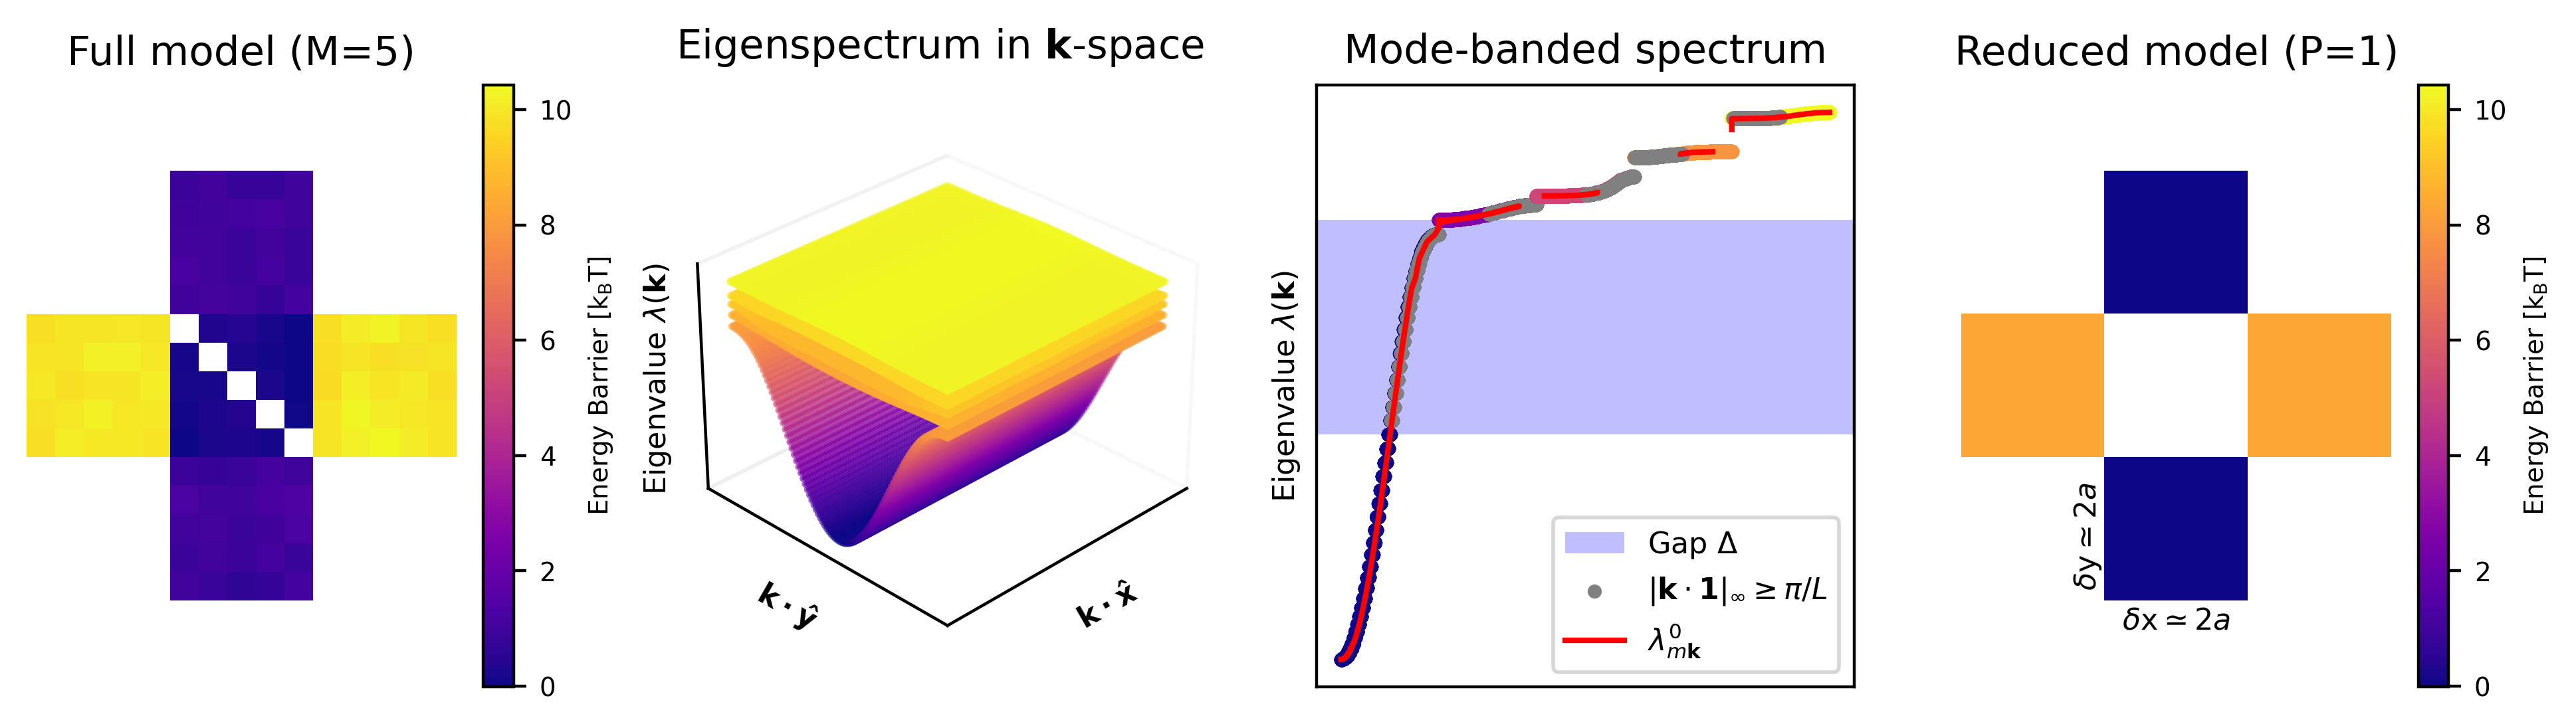

In [3]:
N = 5 # total number of states
rN = 1 # retained modes
l_homog = 2 # homogenization length scale

C,L,R,model_matrix,pi = generate_random_blocks(N=N,std_min=0.5,mean_bar=[1.0,10.0,1.0],std_bar=0.5,connectivity=N)

ev_data = bloch_spectrum(C,L,R,Bx=101)
reduced_model_matrix,approx_ev_function = coarse_grain(C,L,R,ev_data,reduced_modes=rN)

# plot model
fig = plt.figure(dpi=400,figsize=(12,3))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(141)
ax.set_title(r"Full model (M=%d)" % N ,fontsize=11,pad=12)
lims = plot_model(fig,ax,model_matrix,my_cmap=my_cmap,show_cbar=True)

# plot 3D eigenspectrum 
ax = fig.add_subplot(142,projection='3d')
ax.set_title(r"Eigenspectrum in $\mathbf{k}$-space",fontsize=11,pad=16)
plot_spectrum_3d(fig,ax,ev_data.real,my_cmap=my_cmap)

# plot mode-banded spectrum
ax = fig.add_subplot(143)
ax.set_title(r"Mode-banded spectrum",fontsize=11)#,pad=8)
plot_spectrum(fig,ax,ev_data,approx_ev_function,
              my_cmap=my_cmap,plot_approx=2,
              plot_ksel=True,l_homog=l_homog,
              show_band_gap=rN,band_key=False)


# plot reduced model
ax = fig.add_subplot(144)
ax.set_title(r"Reduced model (P=%d)" % rN ,fontsize=11,pad=12)
plot_model(fig,ax,reduced_model_matrix,my_cmap=my_cmap,lim=lims)

# add labels
ax.text(1.0,2.7,r"$\delta{\rm x}\simeq{%da}$" % l_homog,fontsize=8,ha='center',color='k')
ax.text(0.38,2.05,r"$\delta{\rm y}\simeq{%da}$" % l_homog,fontsize=8,ha='center',va='center',color='k',rotation=90);

# save
plt.savefig("model_1.png",bbox_inches='tight')

## Anisotropic, multi-basin diffusion $P=2$

In [4]:
N = 10
rN = 2
C,L,R,model_matrix,pi = generate_random_blocks(N=N,
                                    std_min=.5,
                                    mean_bar=[0.5,6.,6.],
                                    std_bar=0.5,
                                    connectivity=N,
                                    sub_basin=True,
                                    sub_basin_size=N//2,
                                    sub_basin_height=0.0,
                                    sub_basin_barrier=10.0,
                                    sub_basin_aniso=True,
                                    sub_basin_migration=1.0
                                   )

ev_data = bloch_spectrum(C,L,R,Bx=101)

reduced_model_matrix,approx_ev_function,rQ = coarse_grain(C,L,R,ev_data,reduced_modes=rN,return_Q=True,pi=pi)


/Users/ts/miniconda3/envs/julia/lib/python3.10/site-packages/msmtools/analysis/dense/pcca.py:284: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))
/Users/ts/Code/TAMMBER/ReactionDiffusion/helper_scripts.py:373: RuntimeWarning: divide by zero encountered in log
  lrM = np.where(rM<=1e-13,np.nan,-np.log(rM))
/Users/ts/Code/TAMMBER/ReactionDiffusion/helper_scripts.py:373: RuntimeWarning: invalid value encountered in log
  lrM = np.where(rM<=1e-13,np.nan,-np.log(rM))


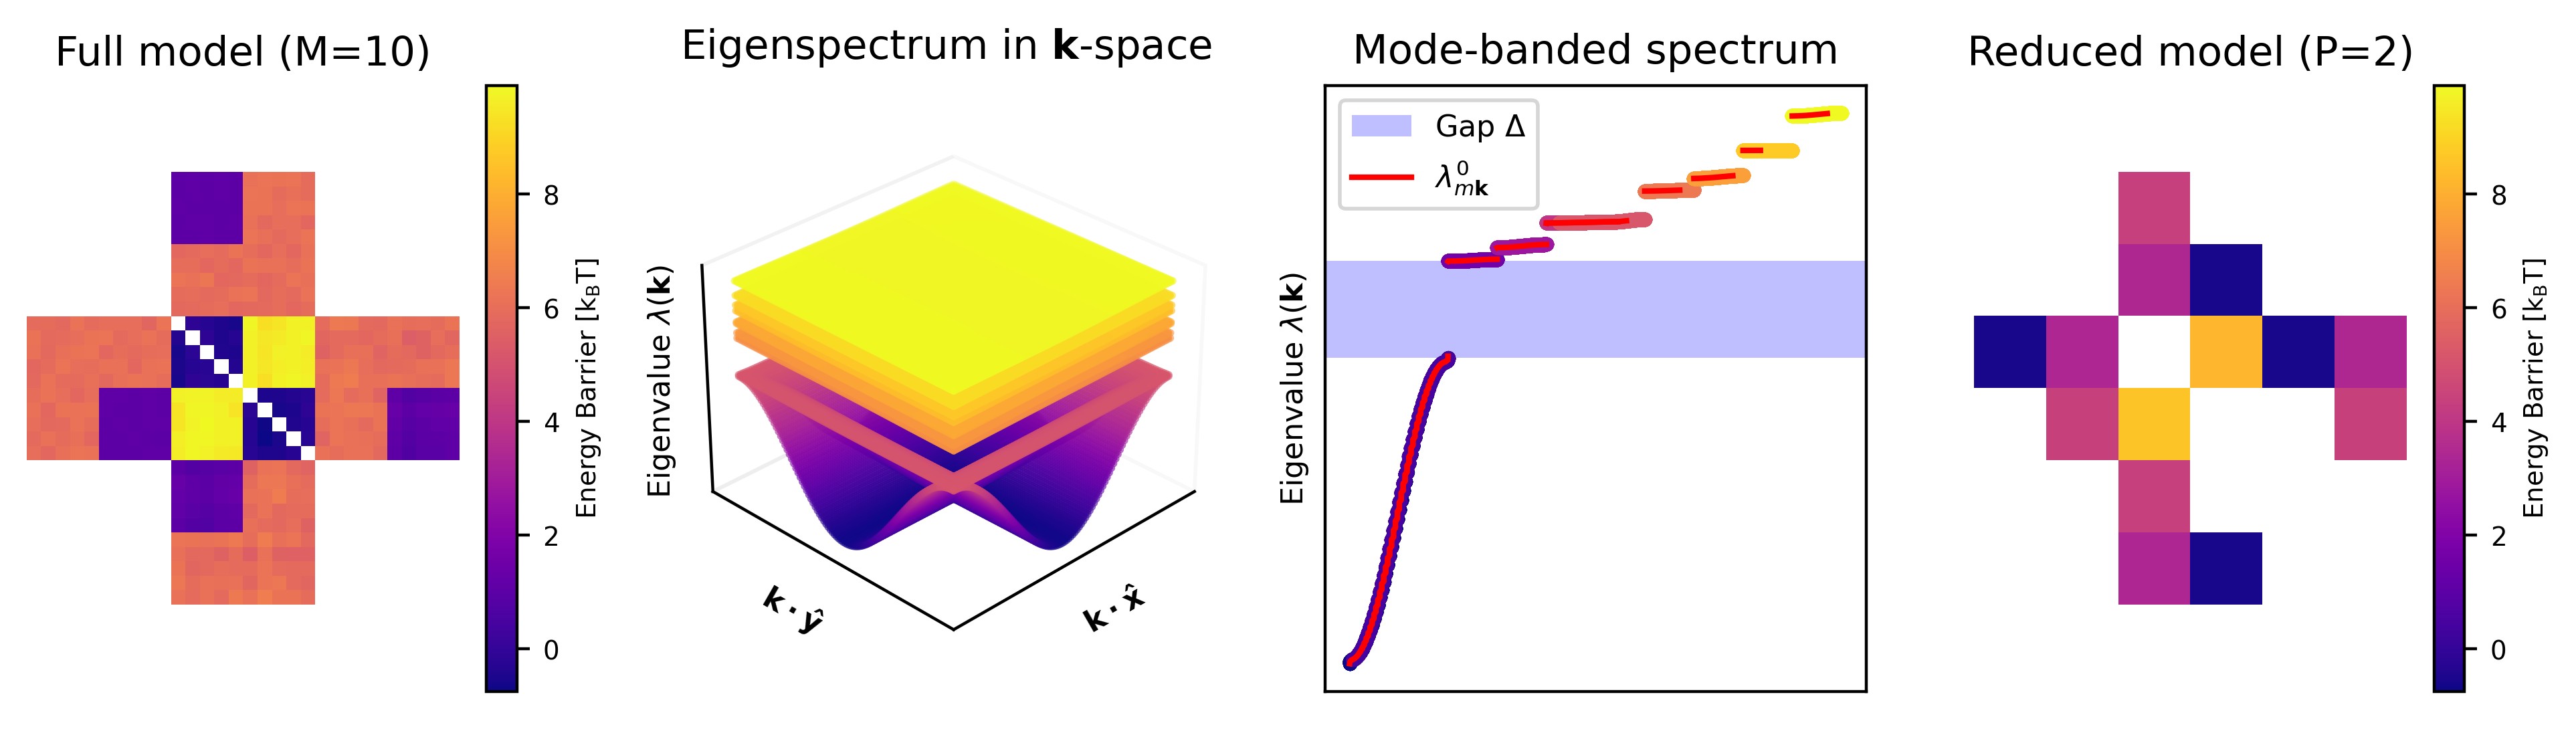

In [5]:
# plot model
fig = plt.figure(dpi=400,figsize=(12,3))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(141)
ax.set_title(r"Full model (M=%d)" % N ,fontsize=11,pad=12)
lims = plot_model(fig,ax,model_matrix,my_cmap=my_cmap)

# plot 3D eigenspectrum 
ax = fig.add_subplot(142,projection='3d')
ax.set_title(r"Eigenspectrum in $\mathbf{k}$-space",fontsize=11,pad=16)
plot_spectrum_3d(fig,ax,ev_data.real,my_cmap=my_cmap)

# plot mode-banded spectrum
ax = fig.add_subplot(143)
ax.set_title(r"Mode-banded spectrum",fontsize=11)#,pad=8)
plot_spectrum(fig,ax,ev_data,approx_ev_function,
              my_cmap=my_cmap,plot_approx=2,
              plot_ksel=False,l_homog=1,
              show_band_gap=rN,band_key=False)

# plot reduced model
ax = fig.add_subplot(144)
ax.set_title(r"Reduced model (P=%d)" % rN ,fontsize=11,pad=12)
plot_model(fig,ax,reduced_model_matrix,my_cmap=my_cmap,lim=lims)

plt.savefig("model_2.png",bbox_inches='tight')

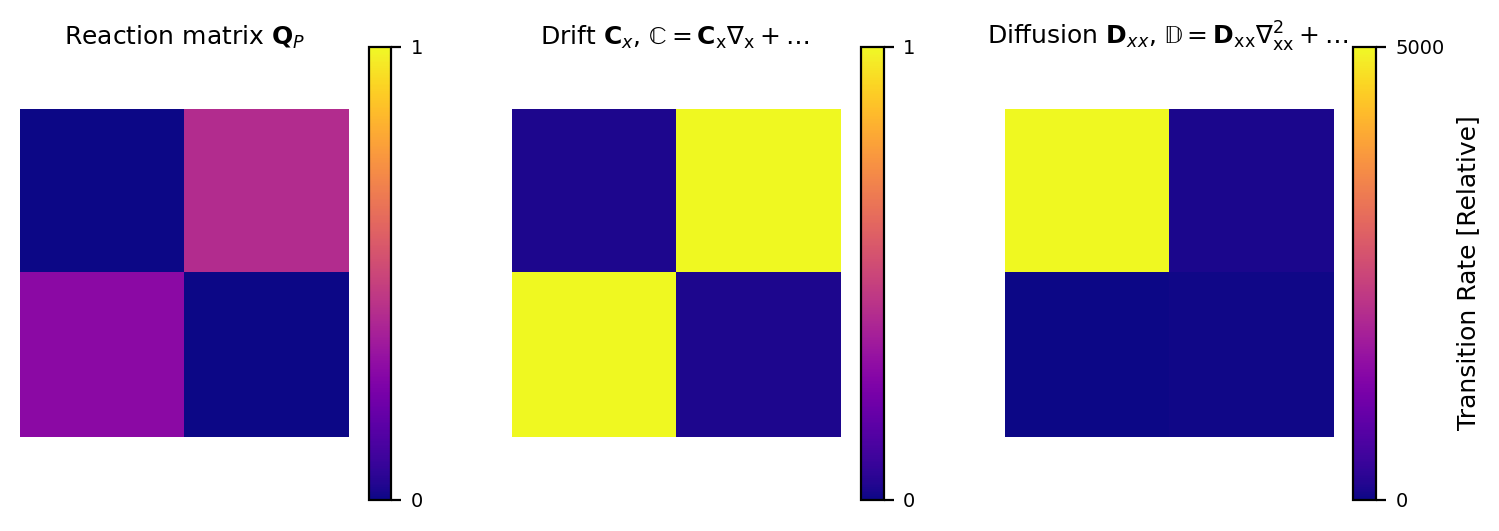

In [6]:
def plot_rates(fig,ax,M,my_cmap = 'cividis',lim=None,cb=False):
    sel = (~np.isnan(M))
    if lim is None:
        lim = [M[sel].min(),M[sel].max()]
    im = ax.matshow(M,cmap=plt.get_cmap(my_cmap),vmin=lim[0],vmax=lim[1])
    
    cbar = fig.colorbar(im)
    cbar.set_ticks([lim[0],lim[1]])
    cbar.ax.tick_params(labelsize=7)
    if cb:
        cbar.set_label('Transition Rate [Relative]',fontsize=9)
    ax.set_axis_off()
    return lim

rC = rQ[2:4,4:]-rQ[2:4,:2]
rD = rQ[2:4,4:]+rQ[2:4,:2]
C = rQ[2:4,2:4]-np.diag(np.diag(rQ[2:4,2:4]))
lim = max(rC.max(),C.max())

fig = plt.figure(dpi=200,figsize=(9,3))
fig.patch.set_facecolor('white')


ax = fig.add_subplot(131)
ax.set_title(r"Reaction matrix $\mathbf{Q}_P$",fontsize=9)
plot_rates(fig,ax,C/lim,my_cmap=my_cmap,lim=[0,1])


ax = fig.add_subplot(132)
ax.set_title(r"Drift ${\bf C}_{x}$, $\rm\mathbb{C}={\bf C}_{x}\nabla_x+\dots$ ",fontsize=9)

plot_rates(fig,ax,np.abs(rC)/lim,my_cmap=my_cmap,lim=[0,1])

ax = fig.add_subplot(133)

ax.set_title(r"Diffusion ${\bf D}_{xx}$, $\rm\mathbb{D}={\bf D}_{xx}\nabla^2_{xx}+\dots$ ",fontsize=9)


plot_rates(fig,ax,rD/lim,my_cmap=my_cmap,lim=[0,1000*int(0.001*rD.max()/lim)],cb=True)

plt.savefig("model_2_terms.png",bbox_inches='tight')
